# **Problem Statement**

Leveraging the transactional data collected by an American multinational retail giant during Black Friday to make predictions on the spending behavior of 100M customers by analyzing the customer purchase behavior against customer's gender, age-group, occupation, city, years stayed in the current city, marital status & product category, thus helping the business make better decisions.

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#importing data set

df = pd.read_csv('retail.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
df.shape

(550068, 10)

In [6]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')
print(f'Each row represents a transaction made on Black Friday and columns represent customer/product attributes')

There are 550068 rows and 10 columns in the dataset
Each row represents a transaction made on Black Friday and columns represent customer/product attributes


In [7]:
#data overiew - non-null counts and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- Categorical variables of type *int*    - User_ID, Occupation, Marital_Status, Product_Category
- Categorical variables of type *object* - Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years
- Numerical(Continuous) variable of type *int*    - Purchase

In [8]:
#percentage of null values in each column

df.isnull().sum()*100/len(df)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

There is no null value in the data set

# **Non-Graphical Analysis**

In [9]:
#number of unique values

df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**Checking value counts of categorical columns**

In [10]:
#checking column User_ID

df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

* Total number of unique customers in the sample - 5891
* Number of transactions by a customer: Max - 1026, Min - 6

In [11]:
#checking column Product_ID

df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

* Total number of unique products in the sample - 3631
* Number of times a product has been purchased: Max - 1880, Min - 1

In [12]:
print(df[df['Product_ID']=='P00265242']['Product_Category'].head(1))
print(df[df['Product_ID']=='P00025442']['Product_Category'].head(1))
print(df[df['Product_ID']=='P00110742']['Product_Category'].head(1))
print(df[df['Product_ID']=='P00265242']['Purchase'].head(1))

399    5
Name: Product_Category, dtype: int64
667    1
Name: Product_Category, dtype: int64
342    1
Name: Product_Category, dtype: int64
399    8652
Name: Purchase, dtype: int64


In [13]:
#checking column Gender

df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

* Number of transactions made by male customers are 3 times that of female customers

In [14]:
#checking column Age

df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

* Majority of the transactions are made by customers in the age range 26-35

In [15]:
#checking column occupation

df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

* Column occupation is masked with values ranging from 0-20

In [16]:
#checking column City_Category

df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

* Customers belong either of the 3 cities masked with values A, B, C

In [17]:
#checking column Stay_In_Current_City_Years

df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

* Number of years a customer stayed in the current city is classified into 5 categories 0,1,2,3, and 4+

In [18]:
#checking column Marital_Status

df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

* Column Marital_Status contains two value 0&1 with 1 being partnered

In [19]:
#Mapping marital status 0/1 to Single/Partnered

df['Marital_Status'] = df['Marital_Status'].map({0:'Unmarried', 1:'Married'})

In [20]:
#checking column Product_Category

df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

* Products belong to 20 different categories with masked values 1-20
* Categories 1, 5 & 8 accounts for three-fourth of the total sales

**Checking descriptive statistics of continuous column**

In [21]:
#checking column Purchase

df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

* Purchase price range from 12 to 23,961 with an average value of 9,264

# **Visual Analysis**

## **Analyzing customer attributes with purchase amount**

In [22]:
#Analysing customer attributes

#Unique customer columns
df_customer = df.drop(columns=['Product_ID', 'Product_Category', 'Purchase']).drop_duplicates()
#group by customer ID to get total purchase amount of every custmer
df_cust_purchase = df.groupby('User_ID')['Purchase'].sum().to_frame()
#merge customer attributes and total purchase
df_customer = df_customer.merge(df_cust_purchase, left_on='User_ID', right_on='User_ID')
df_customer.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,Unmarried,334093
1,1000002,M,55+,16,C,4+,Unmarried,810472
2,1000003,M,26-35,15,A,3,Unmarried,341635
3,1000004,M,46-50,7,B,2,Married,206468
4,1000005,M,26-35,20,A,1,Married,821001


In [23]:
# customer - purchase

df_customer['Purchase'].describe().to_frame()

,Purchase
count,5.891000e+03
mean,8.650166e+05
std,9.436445e+05
min,4.668100e+04
25%,2.376780e+05
50%,5.212130e+05
75%,1.119250e+06
max,1.053691e+07


**Observing the outliers of purchase**

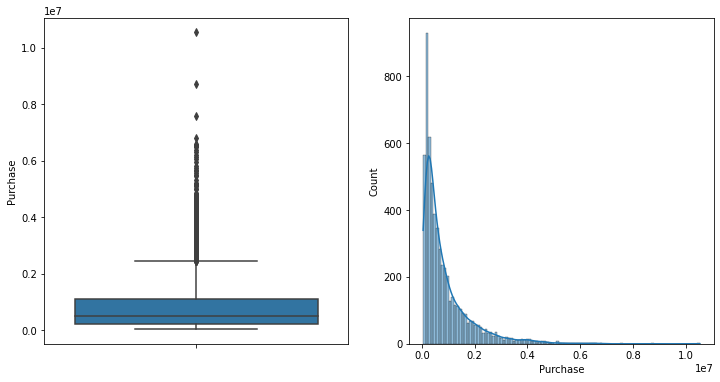

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(data=df_customer, y='Purchase')

plt.subplot(122)
sns.histplot(data=df_customer, x='Purchase', kde=True)
plt.show()

### **Outlier treatment**

IQR = Q3 - Q1<br>
lower limit = max(min, Q1-1.5IQR)<br>
upper limit = min(max, Q3+1.5IQR)

In [25]:
Q1 = df_customer['Purchase'].quantile(0.25)
Q3 = df_customer['Purchase'].quantile(0.75)
IQR = Q3 - Q1
low_lt = max(min(df_customer['Purchase']), Q1 - 1.5*IQR)
up_lt = min(max(df_customer['Purchase']), Q3 + 1.5*IQR)
print(low_lt, up_lt)

46681 2441606.75


**Observing the distribution after removing outliers**

In [26]:
df_copy = df_customer[df_customer['Purchase'] <= up_lt]
# customer - purchase
df_copy['Purchase'].describe().to_frame()

,Purchase
count,5.482000e+03
mean,6.677809e+05
std,5.637426e+05
min,4.668100e+04
25%,2.272235e+05
50%,4.729670e+05
75%,9.389255e+05
max,2.440164e+06


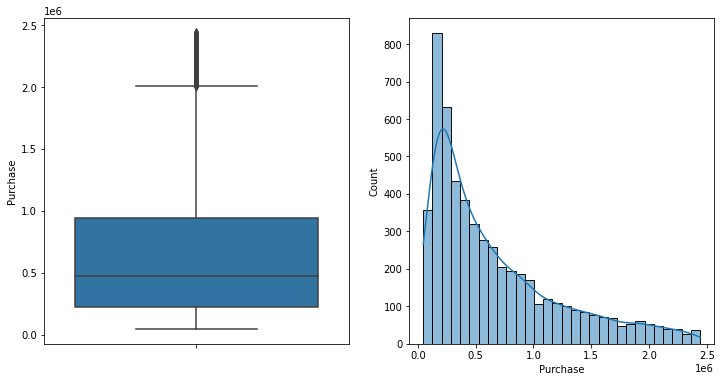

In [27]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(data=df_copy, y='Purchase')

plt.subplot(122)
sns.histplot(data=df_copy, x='Purchase', kde=True)
plt.show()

In [28]:
#Gender - Purchase

df_copy.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,1584.0,573484.713384,512895.998755,46681.0,196487.50,379895.5,784817.75,2439560.0
M,3898.0,706099.355823,578827.818730,49288.0,241576.75,513360.0,999309.75,2440164.0


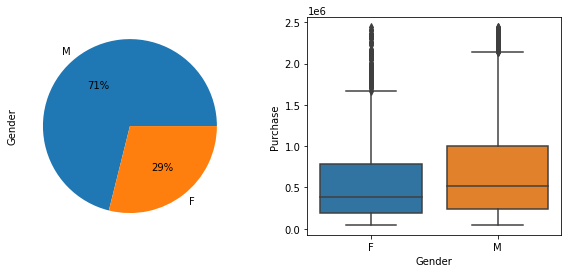

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(121)
df_copy['Gender'].value_counts().plot(kind='pie', autopct='%.f%%')

plt.subplot(122)
sns.boxplot(data=df_copy, y='Purchase', x='Gender')

plt.show()

In [30]:
#Marital_Status - Purchase

df_copy.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,2311.0,651899.826915,552642.799664,49349.0,224100.5,454078.0,914457.0,2440164.0
Unmarried,3171.0,679354.959003,571504.960030,46681.0,228750.0,483928.0,952650.0,2439560.0


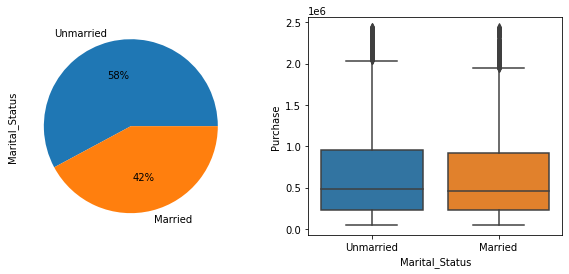

In [31]:
plt.figure(figsize=(10,4))

plt.subplot(121)
df_copy['Marital_Status'].value_counts().plot(kind='pie', autopct='%.f%%')

plt.subplot(122)
sns.boxplot(data=df_copy, y='Purchase', x='Marital_Status')

plt.show()

In [32]:
#Age - Purchase

df_copy.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,213.0,541871.976526,450344.443756,75931.0,196013.00,397746.0,722532.00,2182472.0
18-25,1000.0,680086.987000,572342.810118,53996.0,234999.50,492983.5,949225.75,2439290.0
26-35,1867.0,738521.860739,603847.136635,49288.0,241787.50,536981.0,1074439.00,2439560.0
36-45,1084.0,672091.782288,560349.689942,55960.0,231749.50,470789.5,964854.00,2440164.0
46-50,498.0,599818.415663,509537.052721,62250.0,222970.25,431583.0,827704.50,2422033.0
51-55,454.0,620155.971366,526012.565233,46681.0,226979.25,418096.5,863333.00,2404672.0
55+,366.0,485358.385246,432947.679238,52371.0,177160.75,326790.5,644291.00,2120730.0


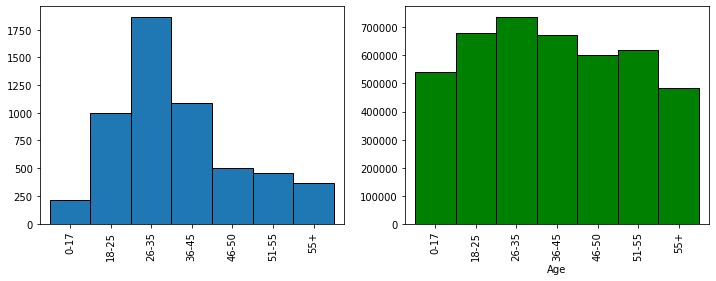

In [33]:
plt.figure(figsize=(12,4))

plt.subplot(121)
df_copy['Age'].value_counts().sort_index().plot(kind='bar', width=1, edgecolor='black')

plt.subplot(122)
df_copy.groupby('Age')['Purchase'].mean().plot(kind='bar', width=1, edgecolor='black', color='green')
plt.show()

In [34]:
#customer - city_category

pd.crosstab(df_copy['City_Category'], df_copy['Gender'], normalize=True, margins=True)

Gender,F,M,All
City_Category,,,
A,0.047063,0.113827,0.160890
B,0.083546,0.183327,0.266873
C,0.158336,0.413900,0.572236
All,0.288946,0.711054,1.000000


In [35]:
#City_Category - Purchase

df_copy.groupby('City_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,882.0,773710.840136,629200.514285,60182.0,246175.5,582385.5,1137523.25,2433544.0
B,1463.0,901884.302802,678434.598645,49668.0,314453.0,694663.0,1407874.00,2440164.0
C,3137.0,528819.056105,426160.807965,46681.0,201311.0,383101.0,737361.00,2413364.0


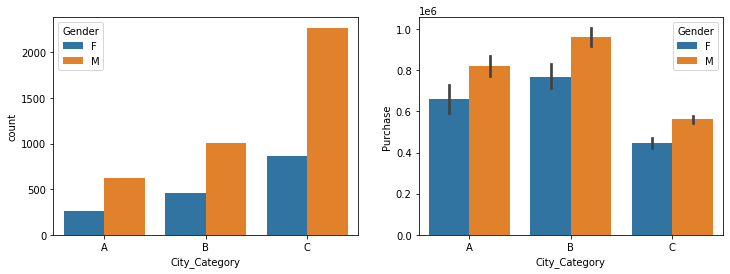

In [36]:
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.countplot(data=df_copy, x='City_Category', hue='Gender', order=['A', 'B', 'C'])

plt.subplot(122)
sns.barplot(data=df_copy, x='City_Category', y='Purchase', hue='Gender', order=['A', 'B', 'C'])
plt.show()

In [37]:
#customer - occupation

df_copy['Occupation'].value_counts()

4     682
7     626
0     622
1     486
17    464
12    362
14    277
20    240
2     239
6     210
16    210
10    189
3     156
13    138
15    132
11    123
5     101
9      84
19     64
18     62
8      15
Name: Occupation, dtype: int64

In [38]:
#Occupation - Purchase

df_copy.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

Occupation
19    777544.062500
5     772524.722772
2     758866.476987
20    745051.133333
11    731820.666667
3     727973.339744
12    720376.582873
16    718307.047619
15    716922.295455
14    707634.314079
4     686277.941349
18    656496.403226
0     656467.977492
17    647113.099138
7     638565.487220
1     637042.872428
6     587782.561905
10    548561.158730
9     485532.071429
13    474581.050725
8     459790.933333
Name: Purchase, dtype: float64

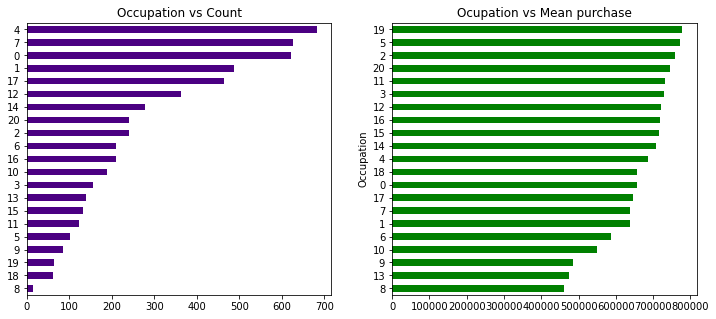

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('Occupation vs Count')
df_copy['Occupation'].value_counts().plot(kind='barh', color='indigo')
plt.gca().invert_yaxis()

plt.subplot(122)
plt.title('Ocupation vs Mean purchase')
df_copy.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False).plot(kind='barh', color='green')
plt.gca().invert_yaxis()

plt.show()

In [40]:
#customer - stay in current city

df_copy['Stay_In_Current_City_Years'].value_counts()

1     1944
2     1082
3      903
4+     839
0      714
Name: Stay_In_Current_City_Years, dtype: int64

In [41]:
#stay in current city - Purchase

df_copy.groupby('Stay_In_Current_City_Years')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,714.0,659472.676471,561164.506473,49668.0,216592.25,464982.0,925204.75,2418970.0
1,1944.0,668286.765432,567141.346970,46681.0,226470.50,465305.5,947524.75,2439560.0
2,1082.0,681871.243068,587422.332584,49349.0,229573.50,471055.0,947721.50,2439290.0
3,903.0,678127.352159,566502.423021,52371.0,228540.50,493220.0,949709.00,2440164.0
4+,839.0,644372.381406,522854.771165,53996.0,233020.50,464179.0,896088.00,2418670.0


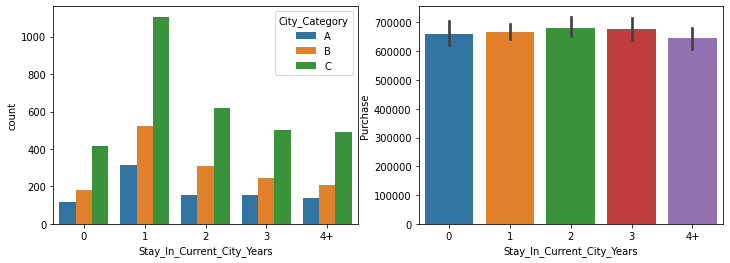

In [42]:
plt.figure(figsize=(12,4))

year= ['0','1','2','3','4+']
city = ['A', 'B', 'C']
plt.subplot(121)
sns.countplot(data=df_copy, x='Stay_In_Current_City_Years', hue='City_Category', hue_order=city, order=year)

plt.subplot(122)
sns.barplot(data=df_copy, x='Stay_In_Current_City_Years', y='Purchase', order=year)
plt.show()

* Most of the customers have stayed in the current city just for an year

## **Observations and Insights made on the basis of above plots**
1. Median purchase amount - 473,000<br><br>
2. 50% of the customers have purchased in the range 227,200 - 1,119,300<br><br>
3. Median purchase of a female customer is 379,900 whereas that of male customers are 513,400, 35% higher<br><br>
4. No significant difference can be observed between the spending behaviour of married and unmarried customers<br><br>
5. 34% of the customers belong to age group 26-35 and 72% of the customers are in an age range 18-45<br><br>
6. Median purchase amount is highest in age group 26-35 and lowest in age group 55+<br><br>
7. More than half of the customers belong to city category C however, it is the category where median purchase price is lowest whereas the highest is from category B<br><br>
8. Customers with occupation 19 tend to purchase for higher amount but, only 1% of the total customers belong to that category and the least average purchase price is for customers with occupation 8 which accounts for less than 1%<br><br>
9. 35% of the customers have an occupation of either 4,7 or 0 and they have an average purchase price between 600k-700k<br><br>
10. Majority of the customers have stayed in the current city for just an year but no correlation is found between customers' spending behavior and years stayed in a city.

## **Analyzing customers with number of purchases**

In [43]:
df_new = df['User_ID'].value_counts().to_frame().rename(columns={'User_ID':'Purchase_count'}).reset_index()
df_customer = df_customer.merge(df_new, left_on='User_ID', right_on='index').drop('index', axis=1)

In [44]:
#Introducing feature average purchase price
df_customer['Avg_Price'] = df_customer['Purchase']/df_customer['Purchase_count']

In [45]:
df_customer.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Purchase_count,Avg_Price
0,1000001,F,0-17,10,A,2,Unmarried,334093,35,9545.514286
1,1000002,M,55+,16,C,4+,Unmarried,810472,77,10525.610390
2,1000003,M,26-35,15,A,3,Unmarried,341635,29,11780.517241
3,1000004,M,46-50,7,B,2,Married,206468,14,14747.714286
4,1000005,M,26-35,20,A,1,Married,821001,106,7745.292453


In [46]:
# customer - purchase

df_customer['Purchase_count'].describe().to_frame()

,Purchase_count
count,5891.000000
mean,93.374300
std,107.190049
min,6.000000
25%,26.000000
50%,54.000000
75%,117.000000
max,1026.000000


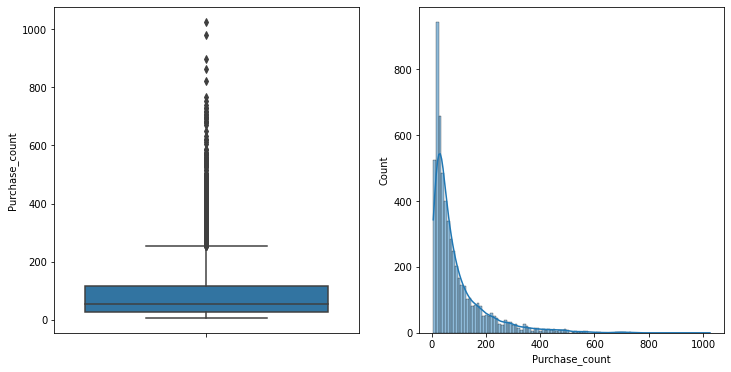

In [47]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(data=df_customer, y='Purchase_count')

plt.subplot(122)
sns.histplot(data=df_customer, x='Purchase_count', kde=True)
plt.show()

### **Outlier treatment**

In [48]:
Q1 = df_customer['Purchase_count'].quantile(0.25)
Q3 = df_customer['Purchase_count'].quantile(0.75)
IQR = Q3 - Q1
low_lt = max(min(df_customer['Purchase_count']), Q1 - 1.5*IQR)
up_lt = min(max(df_customer['Purchase_count']), Q3 + 1.5*IQR)
print(low_lt, up_lt)

6 253.5


**Observing the distribution after removing outliers**

In [49]:
df_copy_count = df_customer[df_customer['Purchase_count'] <= up_lt]
# customer - purchase
df_copy_count['Purchase_count'].describe().to_frame()

,Purchase_count
count,5418.000000
mean,68.210225
std,57.369997
min,6.000000
25%,24.000000
50%,48.000000
75%,95.000000
max,253.000000


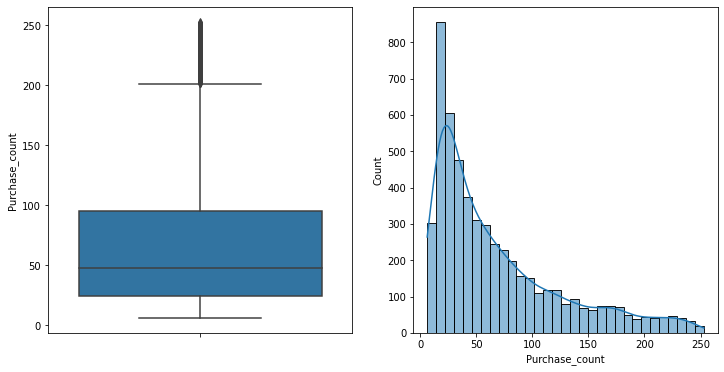

In [50]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(data=df_copy_count, y='Purchase_count')

plt.subplot(122)
sns.histplot(data=df_copy_count, x='Purchase_count', kde=True)
plt.show()

In [51]:
#Gender - Purchase

df_copy_count.groupby('Gender')['Purchase_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,1565.0,62.314377,55.002670,7.0,22.0,41.0,84.0,247.0
M,3853.0,70.604983,58.140547,6.0,25.0,51.0,98.0,253.0


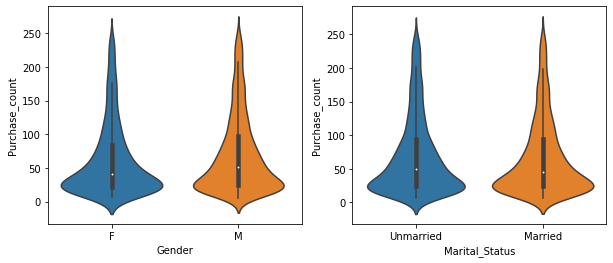

In [52]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.violinplot(data=df_copy_count, y='Purchase_count', x='Gender')

plt.subplot(122)
sns.violinplot(data=df_copy_count, y='Purchase_count', x='Marital_Status')

plt.show()

In [53]:
#Age - Purchase

df_copy_count.groupby('Age')['Purchase_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,212.0,59.438679,47.580822,9.0,24.0,44.0,80.5,237.0
18-25,990.0,70.434343,59.612290,7.0,24.0,50.5,95.0,251.0
26-35,1828.0,73.788840,60.181065,6.0,26.0,53.5,105.0,253.0
36-45,1076.0,68.680297,57.595785,8.0,24.0,48.0,97.0,251.0
46-50,493.0,61.833671,52.431612,8.0,24.0,43.0,81.0,249.0
51-55,453.0,64.156733,54.508785,7.0,24.0,45.0,90.0,252.0
55+,366.0,51.636612,45.387847,7.0,18.0,36.0,70.0,230.0


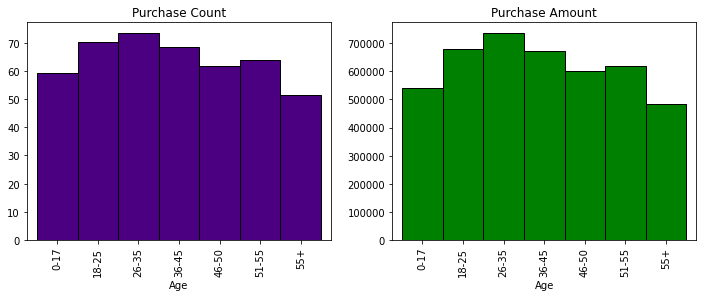

In [54]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Purchase Count')
df_copy_count.groupby('Age')['Purchase_count'].mean().plot(kind='bar', width=1, edgecolor='black', color='indigo')

plt.subplot(122)
plt.title('Purchase Amount')
df_copy.groupby('Age')['Purchase'].mean().plot(kind='bar', width=1, edgecolor='black', color='green')
plt.show()

**Average Purchase**

In [55]:
# customer - purchase

df_customer['Avg_Price'].describe().to_frame()

,Avg_Price
count,5891.000000
mean,9568.839914
std,1890.087105
min,2318.733333
25%,8287.212366
50%,9386.208333
75%,10654.633199
max,18577.893617


## **Analyzing Product category with Gender/Marital Status**

In [56]:
df[df['Gender']=='M']['Product_Category'].value_counts().head()

1     115547
5     108972
8      80367
11     19548
2      18206
Name: Product_Category, dtype: int64

In [57]:
df[df['Gender']=='F']['Product_Category'].value_counts().head()

5    41961
8    33558
1    24831
3     6006
2     5658
Name: Product_Category, dtype: int64

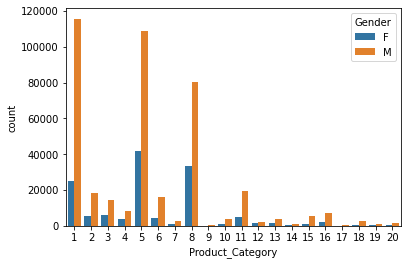

In [58]:
sns.countplot(data=df, x='Product_Category', hue='Gender')
plt.show()

In [59]:
df[df['Marital_Status']=='Married']['Product_Category'].value_counts().head()

5     61277
1     56003
8     48514
2      9726
11     9619
Name: Product_Category, dtype: int64

In [60]:
df[df['Marital_Status']=='Unmarried']['Product_Category'].value_counts().head()

5     89656
1     84375
8     65411
11    14668
2     14138
Name: Product_Category, dtype: int64

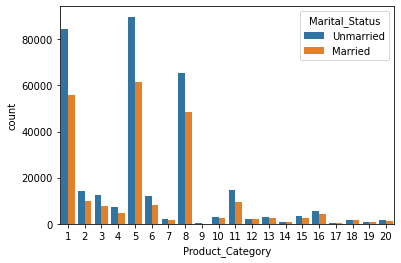

In [61]:
sns.countplot(data=df, x='Product_Category', hue='Marital_Status')
plt.show()

## **Observations and Insights made on the basis of above plots and tables**

1. Median number of items purchased by a customer is 48<br><br>
2. Median purchase count for a female customer is 41 and that of a male customer is 51, 25% higher.<br><br>
3. No significant difference is observed between the purchase count and marital status<br><br>
4. Customers in age-group 26-35 tend to purchase more items 55+ customers purchase least number of items<br><br>
5. Prdouct categories with most number of sales are 1, 5 & 8<br><br>
6. Male customers purchase most of their products from category 1 whereas female customers prefer from category 5 the most<br><br>
8. No significant difference in purchase category is found with customer's marital status

# **Statistical Analysis**

## **CLT for C.I on mean Purchase**

In [62]:
# creating r=10000 bootstrap samples and each bootstrap sample be of size=size
# bs_means is a list of 'r' bootstrap sample means

'''
input
1. col_head: Gender/Marital_Status/Age
2. col_name: values eg: Male
3. data: list of purchase amount
4. size: sample size
@return: dictionary with summary of estimated mean and CIs
'''
def conf_interval(col_head, col_name, data, size):
    r = 10000
    bs_means = np.empty(r)

    for i in range(r):
        bs_sample = np.random.choice(data, size=size)
        bs_means[i] = np.mean(bs_sample)
        
    # plot sample distribution
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title('Sample Distribution')
    plt.hist(data, bins=100)
    
    # plot sampling distribution
    plt.subplot(122)
    plt.hist(bs_means, bins=100, color='green')
    plt.grid()
    plt.title('Sampling Distribution')
    plt.show()
    
    #sample mean
    print('Sample mean -', np.mean(data), '\n')
    
    #dictionary
    dic = {}
    
    #compute C.I on the mean given that bs_means follows Gaussian distribution: CLT
    mean = np.mean(bs_means).astype('int')
    se = np.std(bs_means).astype('int')
    print('Estimated average purchase of population -', mean)
    dic[col_head] = col_name
    dic['Mean'] = mean
    print('Standard error -', se, '\n')
    
    cl = ['90%_CI', '95%_CI', '99%_CI']
    zs = [1.645, 1.96, 2.576]
    #compute 90%, 95% & 99% CI
    for i in range(3):
        ci = f'{(mean-zs[i]*se).astype("int")} - {(mean+zs[i]*se).astype("int")}'
        dic[cl[i]] = ci
        
    return dic

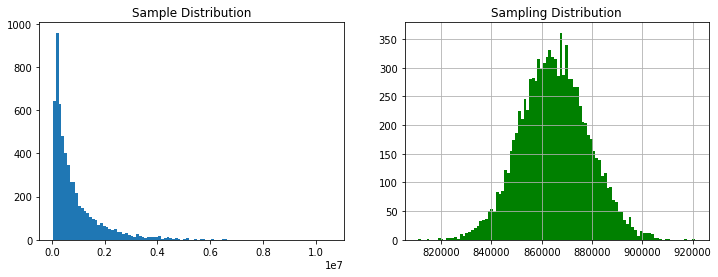

Sample mean - 865016.5917501273 

Estimated average purchase of population - 864992
Standard error - 13436 



{'Customer': 'All',
 'Mean': 864992,
 '90%_CI': '842889 - 887094',
 '95%_CI': '838657 - 891326',
 '99%_CI': '830380 - 899603'}

In [63]:
conf_interval('Customer', 'All', df_customer['Purchase'], 5000)

### **1. Gender**

In [64]:
df_gender = pd.DataFrame(columns=['Gender', 'Mean', '90%_CI', '95%_CI', '99%_CI'])

**a. Male**

In [65]:
df_purchase_male = df_customer[df_customer['Gender']=='M'][['User_ID', 'Gender', 'Purchase']]
df_purchase_male

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668
...,...,...,...
5884,1001674,M,94838
5887,1004871,M,108545
5888,1004113,M,213550
5889,1005391,M,60182


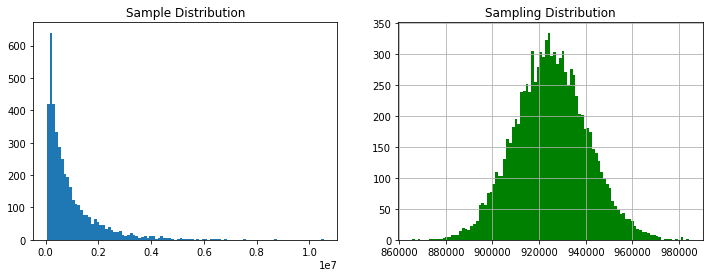

Sample mean - 925344.4023668639 

Estimated average purchase of population - 925097
Standard error - 15432 



In [66]:
dic = conf_interval('Gender', 'Male', df_purchase_male['Purchase'], 4000)
df_gender = pd.concat([df_gender, pd.DataFrame([dic])], ignore_index=True)

**b. Female**

In [67]:
df_purchase_female = df_customer[df_customer['Gender']=='F'][['User_ID', 'Gender', 'Purchase']]
df_purchase_female

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490
...,...,...,...
5879,1000455,F,139887
5880,1000527,F,86847
5882,1000703,F,102328
5885,1004293,F,276411


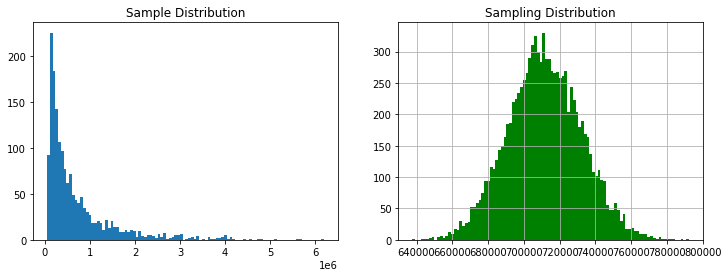

Sample mean - 712024.3949579832 

Estimated average purchase of population - 711620
Standard error - 20565 



In [68]:
dic = conf_interval('Gender', 'Female', df_purchase_female['Purchase'], 1500)
df_gender = pd.concat([df_gender, pd.DataFrame([dic])], ignore_index=True)

In [69]:
df_gender

,Gender,Mean,90%_CI,95%_CI,99%_CI
0,Male,925097,899711 - 950482,894850 - 955343,885344 - 964849
1,Female,711620,677790 - 745449,671312 - 751927,658644 - 764595


### **2. Marital Status**

In [70]:
df_marital_st = pd.DataFrame(columns=['Marital_Status', 'Mean', '90%_CI', '95%_CI', '99%_CI'])

**a. Married**

In [71]:
df_purchase_mar = df_customer[df_customer['Marital_Status']=='Married'][['User_ID', 'Marital_Status', 'Purchase']]
df_purchase_mar

,User_ID,Marital_Status,Purchase
3,1000004,Married,206468
4,1000005,Married,821001
6,1000007,Married,234668
7,1000008,Married,796593
9,1000010,Married,2169510
...,...,...,...
5881,1000640,Married,131545
5882,1000703,Married,102328
5883,1001282,Married,93851
5885,1004293,Married,276411


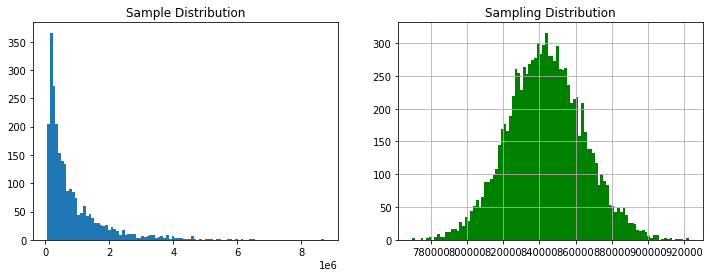

Sample mean - 843526.7966855295 

Estimated average purchase of population - 843440
Standard error - 20874 



In [72]:
dic = conf_interval('Marital_Status', 'Married', df_purchase_mar['Purchase'], 2000)
df_marital_st = pd.concat([df_marital_st, pd.DataFrame([dic])], ignore_index=True)

**b. Unmarried**

In [73]:
df_purch_unmar = df_customer[df_customer['Marital_Status']=='Unmarried'][['User_ID', 'Marital_Status', 'Purchase']]
df_purch_unmar

,User_ID,Marital_Status,Purchase
0,1000001,Unmarried,334093
1,1000002,Unmarried,810472
2,1000003,Unmarried,341635
5,1000006,Unmarried,379930
8,1000009,Unmarried,594099
...,...,...,...
5884,1001674,Unmarried,94838
5886,1004588,Unmarried,140990
5887,1004871,Unmarried,108545
5888,1004113,Unmarried,213550


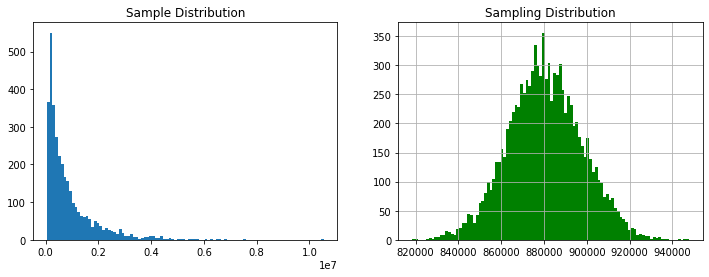

Sample mean - 880575.7819724905 

Estimated average purchase of population - 880532
Standard error - 17242 



In [74]:
dic = conf_interval('Marital_Status', 'Unmarried', df_purch_unmar['Purchase'], 3000)
df_marital_st = pd.concat([df_marital_st, pd.DataFrame([dic])], ignore_index=True)

In [75]:
df_marital_st

,Marital_Status,Mean,90%_CI,95%_CI,99%_CI
0,Married,843440,809102 - 877777,802526 - 884353,789668 - 897211
1,Unmarried,880532,852168 - 908895,846737 - 914326,836116 - 924947


### **3. Age**

In [76]:
df_age = pd.DataFrame(columns=['Age', 'Mean', '90%_CI', '95%_CI', '99%_CI'])
age = df_customer['Age'].value_counts().sort_index().index
count = df_customer['Age'].value_counts().to_frame().sort_index()['Age'].to_list()

0-17


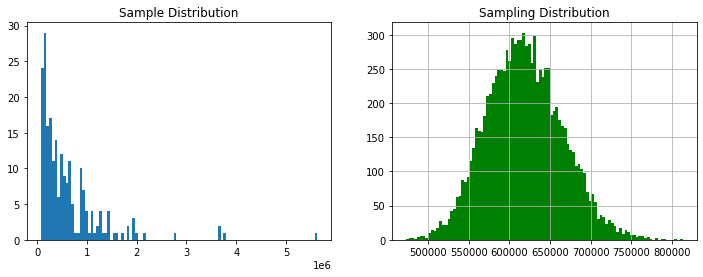

Sample mean - 618867.8119266055 

Estimated average purchase of population - 618638
Standard error - 46497 

18-25


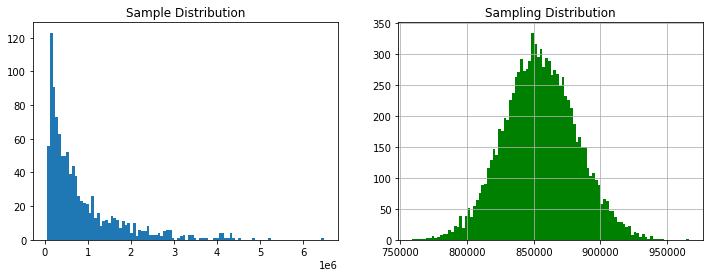

Sample mean - 854863.119738073 

Estimated average purchase of population - 854716
Standard error - 27247 

26-35


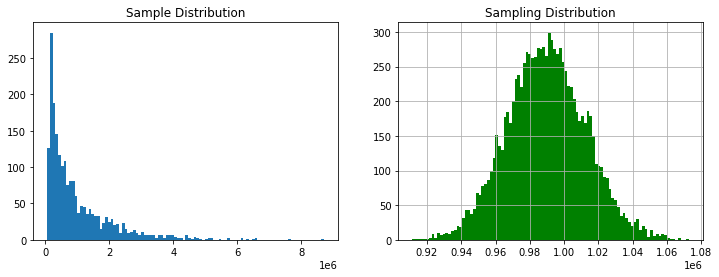

Sample mean - 989659.3170969313 

Estimated average purchase of population - 989642
Standard error - 22755 

36-45


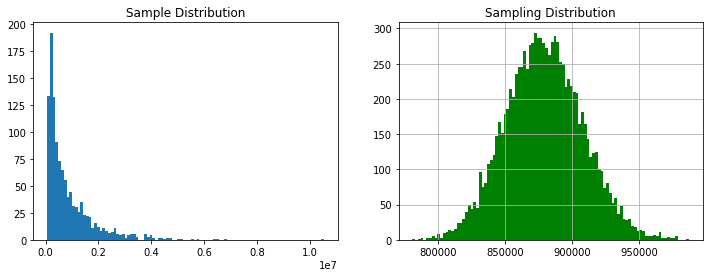

Sample mean - 879665.7103684661 

Estimated average purchase of population - 879309
Standard error - 28751 

46-50


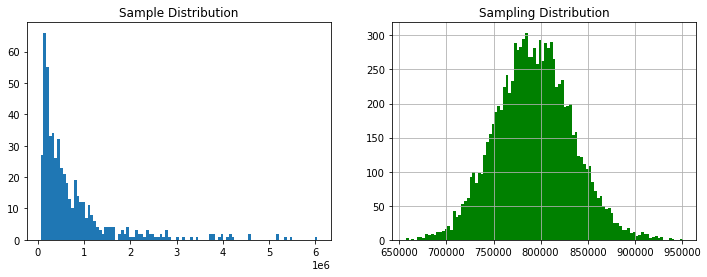

Sample mean - 792548.7815442561 

Estimated average purchase of population - 793046
Standard error - 40399 

51-55


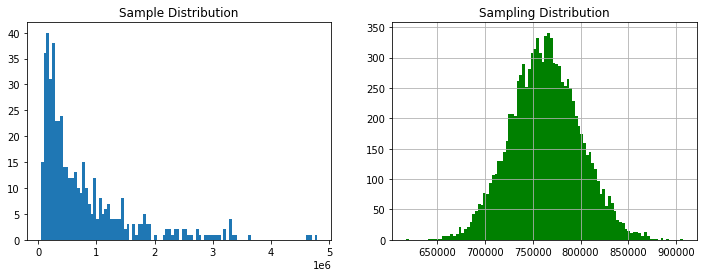

Sample mean - 763200.9230769231 

Estimated average purchase of population - 763071
Standard error - 36188 

55+


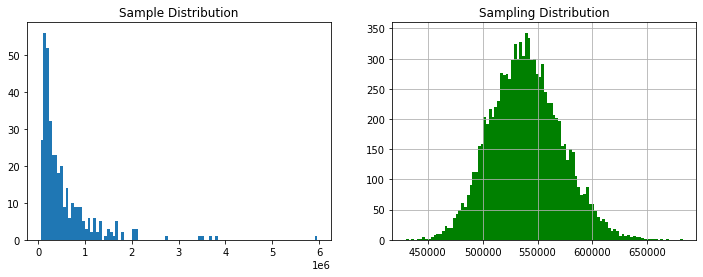

Sample mean - 539697.2446236559 

Estimated average purchase of population - 539627
Standard error - 31945 



In [77]:
for i in range(len(age)):
    print(age[i])
    dic = conf_interval('Age', age[i], df_customer[df_customer['Age']==age[i]]['Purchase'], count[i])
    df_age = pd.concat([df_age, pd.DataFrame([dic])], ignore_index=True)

In [78]:
df_age

,Age,Mean,90%_CI,95%_CI,99%_CI
0,0-17,618638,542150 - 695125,527503 - 709772,498861 - 738414
1,18-25,854716,809894 - 899537,801311 - 908120,784527 - 924904
2,26-35,989642,952210 - 1027073,945042 - 1034241,931025 - 1048258
3,36-45,879309,832013 - 926604,822957 - 935660,805246 - 953371
4,46-50,793046,726589 - 859502,713863 - 872228,688978 - 897113
5,51-55,763071,703541 - 822600,692142 - 833999,669850 - 856291
6,55+,539627,487077 - 592176,477014 - 602239,457336 - 621917


# **Statistical Analysis - C.I Summary**

In [79]:
df_gender

,Gender,Mean,90%_CI,95%_CI,99%_CI
0,Male,925097,899711 - 950482,894850 - 955343,885344 - 964849
1,Female,711620,677790 - 745449,671312 - 751927,658644 - 764595


In [80]:
df_marital_st

,Marital_Status,Mean,90%_CI,95%_CI,99%_CI
0,Married,843440,809102 - 877777,802526 - 884353,789668 - 897211
1,Unmarried,880532,852168 - 908895,846737 - 914326,836116 - 924947


In [81]:
df_age

,Age,Mean,90%_CI,95%_CI,99%_CI
0,0-17,618638,542150 - 695125,527503 - 709772,498861 - 738414
1,18-25,854716,809894 - 899537,801311 - 908120,784527 - 924904
2,26-35,989642,952210 - 1027073,945042 - 1034241,931025 - 1048258
3,36-45,879309,832013 - 926604,822957 - 935660,805246 - 953371
4,46-50,793046,726589 - 859502,713863 - 872228,688978 - 897113
5,51-55,763071,703541 - 822600,692142 - 833999,669850 - 856291
6,55+,539627,487077 - 592176,477014 - 602239,457336 - 621917


## **Observations made from Confidence Intervals**

1. Estimated mean purchase amount of all the 100 million customers are 865,167 with a 95% confidence interval [838,899 - 891,434]<br><br>
2. Estimated mean purchase amount of 50 million male customers are 925,127 with a 95% confidence interval [894,078 - 956,175] whereas that of female customers are 711,800 with a 95% confidence interval [671,116 - 752,483]<br><br>
3. The mean purchase amount estimated for an unmarried customer is 880,465 with a 95% confidence interval [846,907 - 914,022] and that of a married customer is 843,545 with a 95% confidence interval [802,408 - 884,681]<br><br>
4. The population mean purchase price is estimated the highest among customers in age-group 26-35 with an average value of 989,360 and a 90% confidence interval [951,951 - 1,026,768] and it is the least among age-group 55+ with a mean of 539,977 and 90% confidence interval [487,091 - 592,862]<br><br>
5. For the customers in age-group 18-25, the population mean is estimated to be 854,190 with a 90% confidence interval [809,442 - 898,937] and that among age-group 36-45 is 879,648 with a 90% confidence interval [832,507 - 926,788]<br><br>
6. Similarly the mean and 90% confidence intervals are 793,043 [727,601 - 858,484] and 763432 [704,445 - 822,418] respectively for age-groups 46-50 and 51-55

## **Some Key Insights from CIs**

1. The mean purchase price of male customers are clearly higher, 30% more than that of female customers with no overlap between their confidence intervals at any of the confidence levels 90/95/99%<br><br>
2. Average purchase price of unamarried customers are slightly more than that of married customers but there is a significant overlap between their confidence intervals at all 90/95/99% confidence levels<br><br>
3. Mean purchase amount of age-group 26-35 is 10% more than that of age-group 36-45(second highest) and there is no overlap between their 90/95% confidence intervals<br><br>
4. There is no significant difference between the mean spending of age-group 36-45 and 18-25 as there is a noticeable overlap between their 90% confidence intervals although the average purchase is slightly more for age group 36-45. Similarly between age-group 46-50 and 51-55<br><br>
5. Age-group 55+ has the least average purchase which is significantly lesser than the group 0-17 eventhough there is a little overlap between their 90% confidence intervals

## **Recommendations**

1. Overall male customers can be targeted more as both the average purchase price and average number of items purchased by male customers are significantly higer compared to female customers.<br><br>
2. No customer segmentation based on the marital status is needed as the there is no statistically significant difference in the spending behaviours of the two groups.<br><br>
3. Customers in the age-group 26-35 can be focused more and 55+ can be the least targeted.<br><br>
4. Customers in the age-group 18-45 should be the primary focus as they account for over 70% of the total customers.<br><br>
5. Products from category 1,5 & 8 should be stocked more as they account for 74% of the total sales count.<br><br>
6. Product category 1 should be targeted more towards men and 5 can be targeted towards women as they are the most purchased category among men and women respectively.<br><br>
7. Favourite product with most number of sales is P00265242 which belongs to category 5 so, its stock should be updated regularly<br><br>
8. Changes should be made to attract more customers from city category 'B' as they have the highest median purchase price<br><br>